# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [ ]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [ ]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive")

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


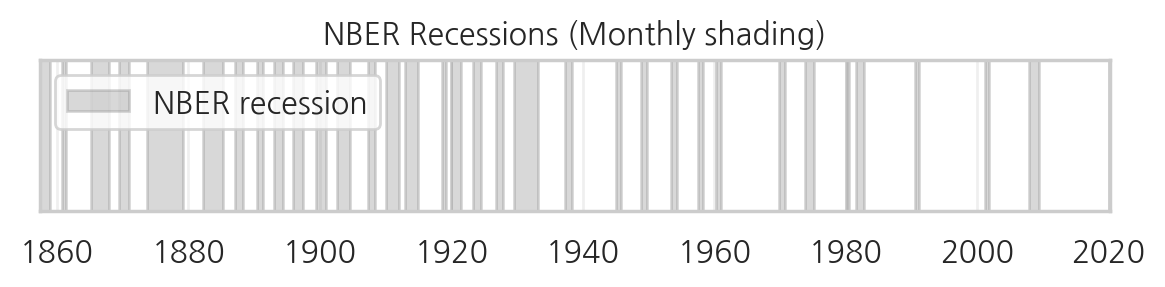

In [ ]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# Main

## QE와 QT에 따른 연준의 자산, 은행권의 지준/초과지준 변화

In [ ]:
# Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)
# Reserves of Depository Institutions: Total  (TOTRESNS)
# Excess Reserves of Depository Institutions (DISCONTINUED)  (EXCSRESNW)

var_list = ['WALCL','TOTRESNS','EXCSRESNW']
start = date(2007,1,1)
end = date(2025,3,31)

df_asset = pdr.get_data_fred(var_list, start=start, end=end)
df_asset.loc[:,['WALCL','EXCSRESNW']] = df_asset.loc[:,['WALCL','EXCSRESNW']]/1000
df_asset = df_asset.resample('M').mean()
df_asset.columns = ['연준 자산','은행권 지준','은행권 초과지준']

df_asset.head(3)

,연준 자산,은행권 지준,은행권 초과지준
DATE,,,
2007-01-31,861.259,44.600,1.620
2007-02-28,867.225,42.600,1.453
2007-03-31,868.371,40.700,1.589


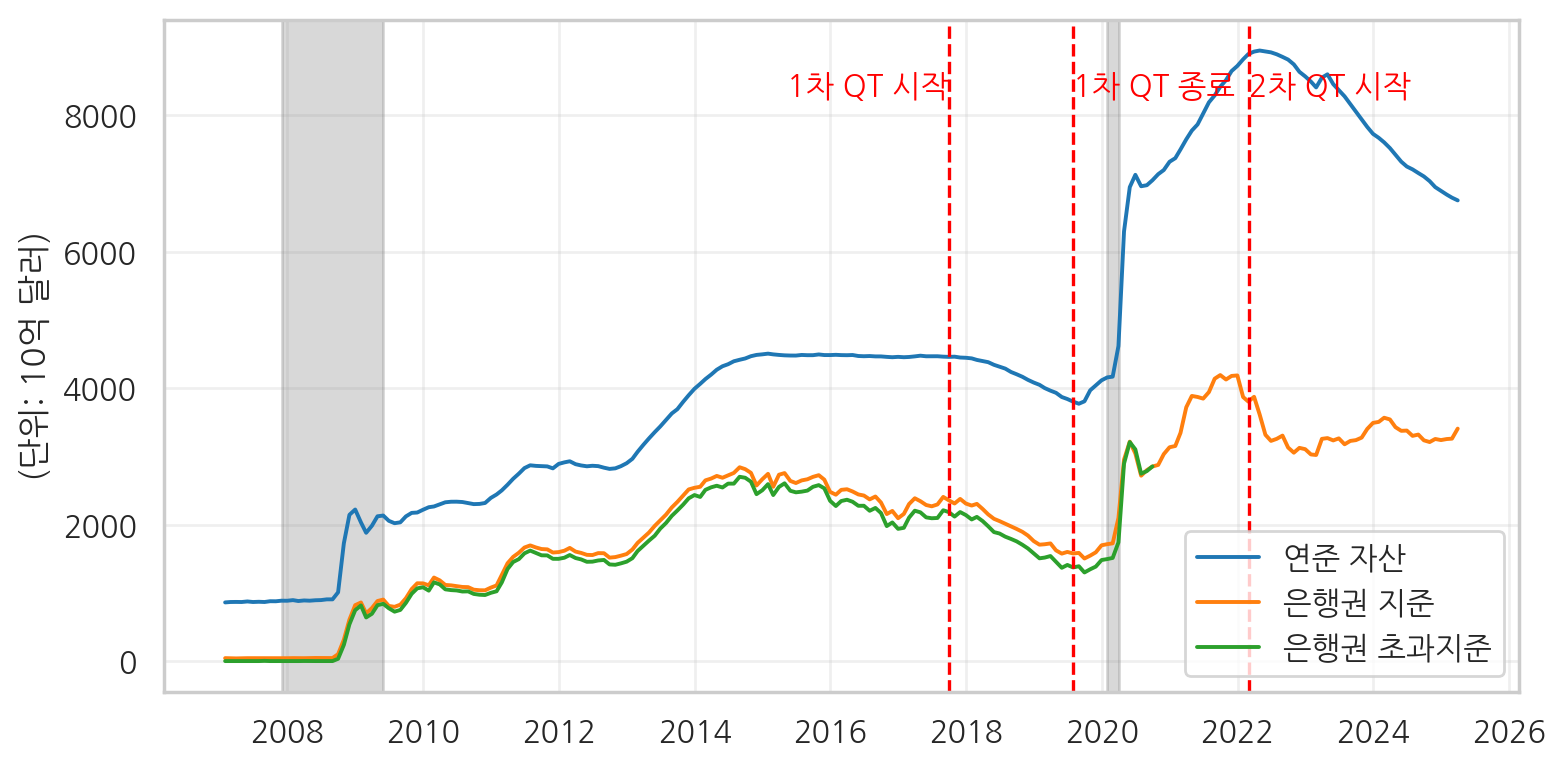

In [ ]:
start_date, end_date = 2007, 2025
df_sub = df_asset.loc[str(start_date):str(end_date)]

vlines=[
    ('2017-10-01', '1차 QT 시작', 'red', '--', 1.2, 'left', 0.9),
    ('2019-08-01', '1차 QT 종료', 'red', '--', 1.2, 'right', 0.9),
    ('2022-03-01', '2차 QT 시작', 'red', '--', 1.2, 'right', 0.9),
]

fig, ax1, ax2 = plot_dual_axis(
    df_sub,
    left_vars=['연준 자산', '은행권 지준', '은행권 초과지준'],
    vlines=vlines,                   # 빨간 점선 수직선
    left_label='(단위: 10억 달러)',
    title='',
    color_mode='default',
    linewidth=1.4,
    return_axes=True,
    show=False
)

# 위 그림의 x범위 기억
xlim = ax1.get_xlim()

plot_nber_recession(ax1, NBERm)
ax1.set_xlim(xlim)

plt.tight_layout()
plt.show()

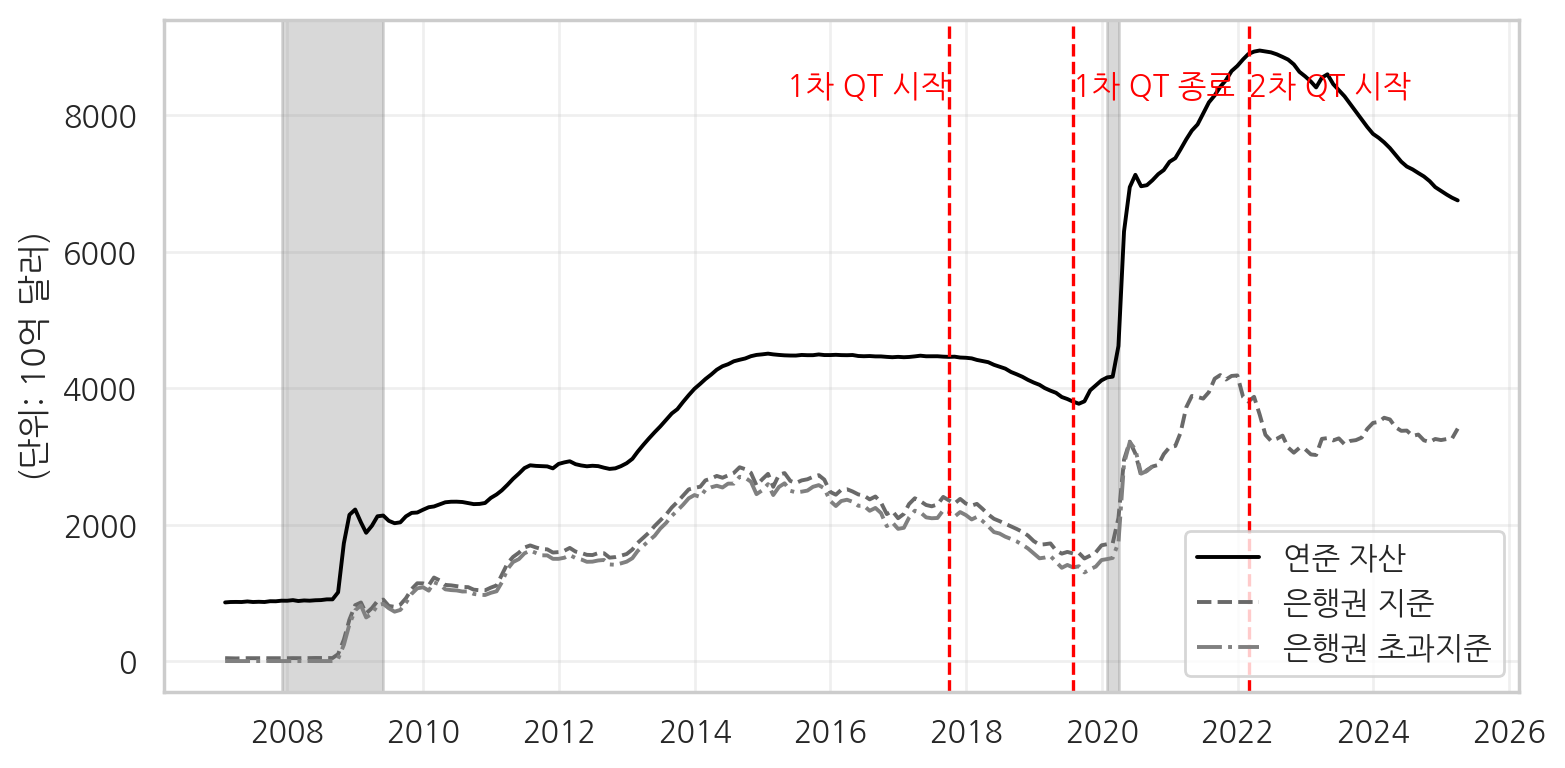

In [ ]:
fig, ax1, ax2 = plot_dual_axis(
    df_sub,
    left_vars=['연준 자산', '은행권 지준', '은행권 초과지준'],
    right_vars=None,                 # 오른쪽 축 없음
    vlines=vlines,                   # 빨간 점선 수직선
    hlines=[],                       # 필요시 추가
    left_label='(단위: 10억 달러)',
    title='',
    color_mode='bw',            # 교재 3색(검정/회색/남색) 고정
    linewidth=1.4,
    return_axes=True,
    show=False
)

# 위 그림의 x범위 기억
xlim = ax1.get_xlim()

plot_nber_recession(ax1, NBERm)
ax1.set_xlim(xlim)

plt.tight_layout()
plt.show()

## 2008년 10월 9일 지준부리 실시 배경

In [ ]:
# Federal Funds Target Rate (DISCONTINUED)  (DFEDTAR)
# Effective Federal Funds Rate  (EFFR)
# Federal Funds Target Range - Lower Limit  (DFEDTARL)
# Federal Funds Target Range - Upper Limit  (DFEDTARU)

var_list = ['DFEDTAR','EFFR','DFEDTARL','DFEDTARU']
start = date(2008,8,1)
end = date(2009,1,31)

df_rates = pdr.get_data_fred(var_list, start=start, end=end)

df_rates.head(3)

,DFEDTAR,EFFR,DFEDTARL,DFEDTARU
DATE,,,,
2008-08-01,2.000,2.040,NaN,NaN
2008-08-02,2.000,NaN,NaN,NaN
2008-08-03,2.000,NaN,NaN,NaN


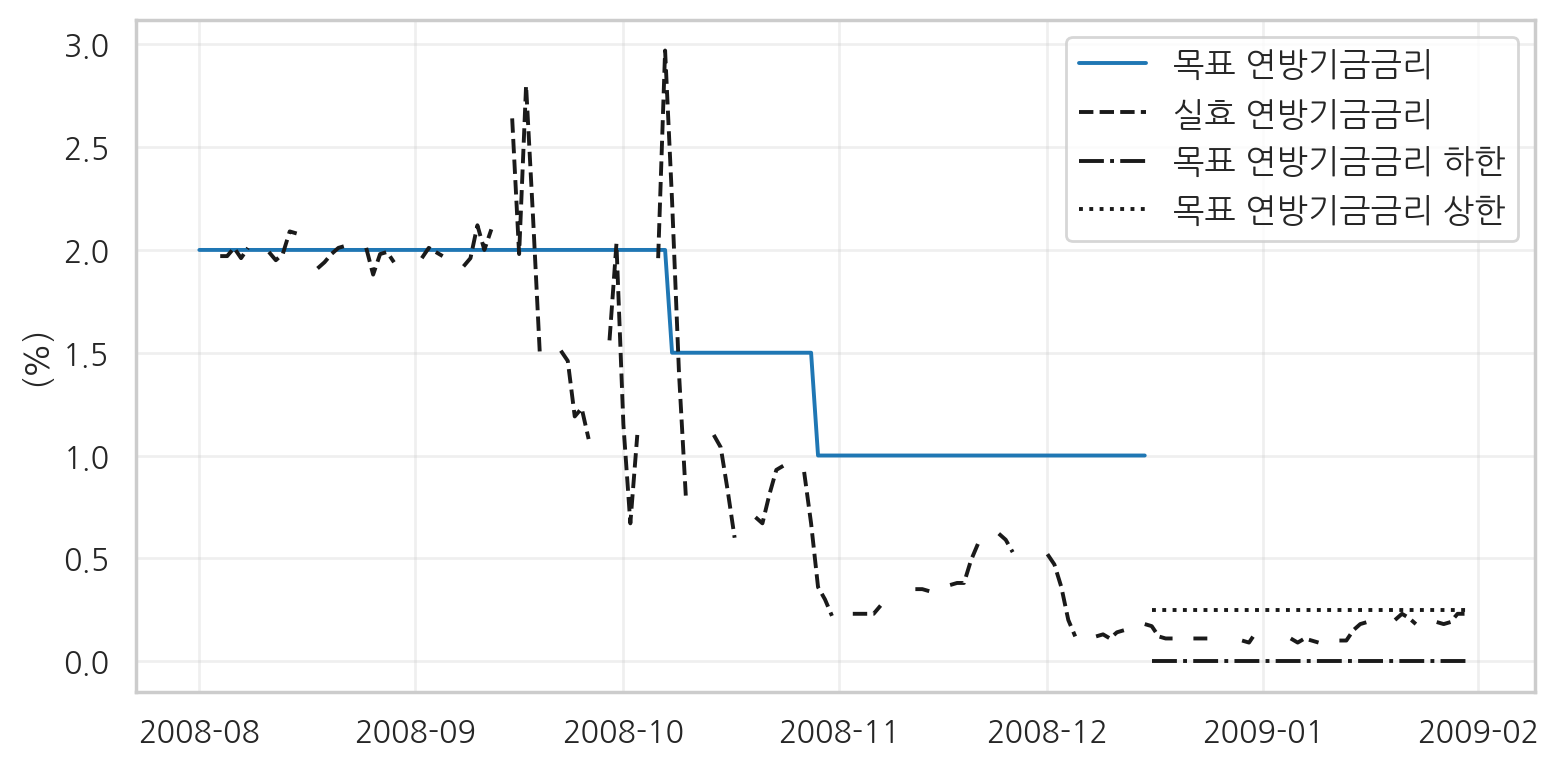

In [ ]:
fig, ax1, ax2 = plot_dual_axis(
    df_rates,
    left_vars=['DFEDTAR', 'EFFR', 'DFEDTARL', 'DFEDTARU'],
    colors=['#1f77b4', 'k', 'k', 'k'],
    linestyles=['-', '--', '-.', ':'],
    linewidth=1.4,
    legend_labels=[
        '목표 연방기금금리',
        '실효 연방기금금리',
        '목표 연방기금금리 하한',
        '목표 연방기금금리 상한'
    ],
    legend_fontsize=12,
    legend_loc="upper right",
    return_axes=True,
    show=True
)

## 2022년 하반기 레고랜드 사태 시기 금융안정지수
### 금융안정지수

In [ ]:
# 엑셀 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/금융불안지수 (FSI).xlsx'

# 엑셀 파일 읽기 (시트 자동 감지 또는 명시)
df = pd.read_excel(file_path, sheet_name=0)  # 또는 sheet_name='Sheet1' 등 명시

df.columns = df.columns.str.strip()  # 공백 제거
df = df.rename(columns={df.columns[0]: 'mdate', df.columns[1]: 'FSI'})

# 필요 없는 상단 행 제거
df = df.iloc[6:, :]

# mdate를 datetime 형식으로 변환
# 연도-월 형식일 경우 (예: 2022-09 또는 202209)
df['mdate'] = pd.to_datetime(df['mdate'], format='%Y-%m', errors='coerce')

# datetime을 인덱스로 설정 (옵션)
df.set_index('mdate', inplace=True)

df.head(3)

,FSI
mdate,
2008-01-01,13.600
2008-02-01,15.300
2008-03-01,17.500


### 기준금리, CPI 인플레이션
- ECOS 통계 코드 검색: https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch

In [ ]:
def ECOS_generate_TS_monthly(df, varlist):
    '''
    ECOS에서 불러 온 df에서 원하는 변수로만 df로 만들기 (monthly 경우)
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:, ['통계항목명1', '시점', '값']]
    df['시점'] = pd.to_datetime(df['시점'], format='%Y%m', errors='coerce')
    df = df.sort_values(by=['통계항목명1', '시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df = df.astype(float)
    return df

In [ ]:
# API key
key_api = key_api_ECOS
service_key = key_api
api = Ecos(service_key)

In [ ]:
date_start = '201101'
date_end = '202501'

df_rate = api.get_statistic_search(통계표코드="722Y001", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)
df_rate

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
0,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,...,None,연%,None,201101,2.75
1,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0102000,정부대출금금리,None,...,None,연%,None,201101,2.76
2,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0104000,자금조정 대출금리,None,...,None,연%,None,201101,3.75
3,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0105000,자금조정 예금금리,None,...,None,연%,None,201101,1.75
4,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0109000,총액한도대출금리,None,...,None,연%,None,201101,1.25
...,...,...,...,...,...,...,...,...,...,...,...
1421,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0107000,무역금융지원 프로그램대출금리,None,...,None,연%,None,202501,1.5
1422,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0108000,신성장·일자리지원 프로그램대출금리,None,...,None,연%,None,202501,1.5
1423,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0111000,영세자영업자지원 프로그램대출금리,None,...,None,연%,None,202501,1.5
1424,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0112000,지방중소기업지원 프로그램대출금리,None,...,None,연%,None,202501,1.5


In [ ]:
varlist = ['한국은행 기준금리']
df_rate = ECOS_generate_TS_monthly(df_rate,varlist)
df_rate.tail()

통계항목명1,한국은행 기준금리
시점,
2024-09-01,3.500
2024-10-01,3.250
2024-11-01,3.000
2024-12-01,3.000
2025-01-01,3.000


In [ ]:
df_inf = api.get_statistic_search(통계표코드="901Y009", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)

varlist = ['총지수']
df_inf = ECOS_generate_TS_monthly(df_inf,varlist)

df_inf = df_inf.pct_change(12)*100
df_inf.columns = ['CPI']

df_inf.dropna(inplace=True)
df_inf.head(3)

,CPI
시점,
2012-01-01,3.346
2012-02-01,3.033
2012-03-01,2.663


In [ ]:
# FSI, 기준금리, CPI 인플레이션 결합
df_main = pd.concat([df, df_rate, df_inf], axis=1)
df_main.dropna(inplace=True)
df_main.tail(3)

,FSI,한국은행 기준금리,CPI
2024-11-01,17.600,3.000,1.526
2024-12-01,18.800,3.000,1.934
2025-01-01,19,3.000,2.244


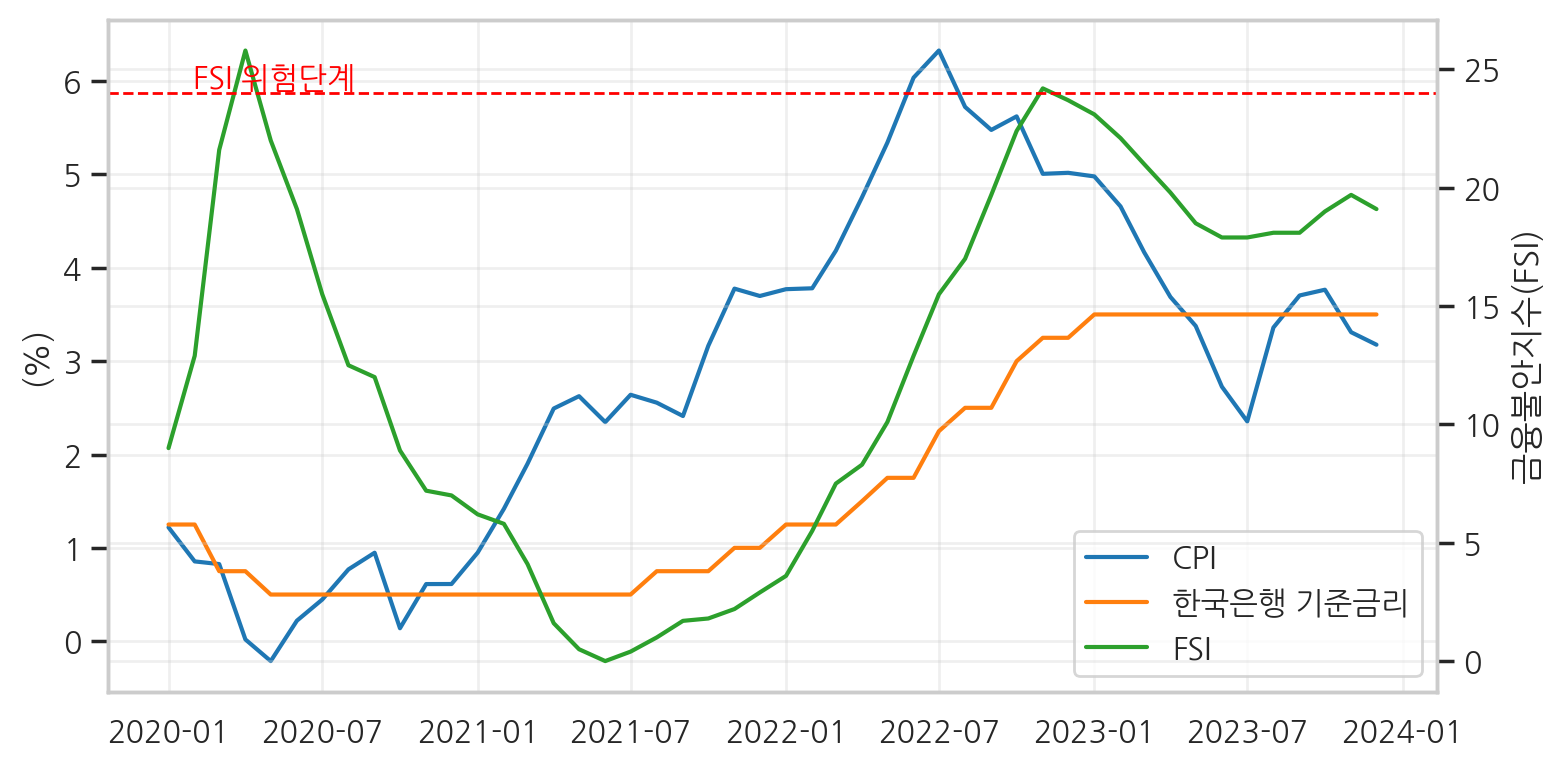

In [ ]:
plot_dual_axis(
    df_main.loc['2020-01':'2023-12'],
    left_vars=['CPI', '한국은행 기준금리'],
    right_vars=['FSI'],
    hlines=[(24, 'FSI 위험단계', 'red', 'right')],
    left_label='(%)',
    right_label='금융불안지수(FSI)',
    title=''
)

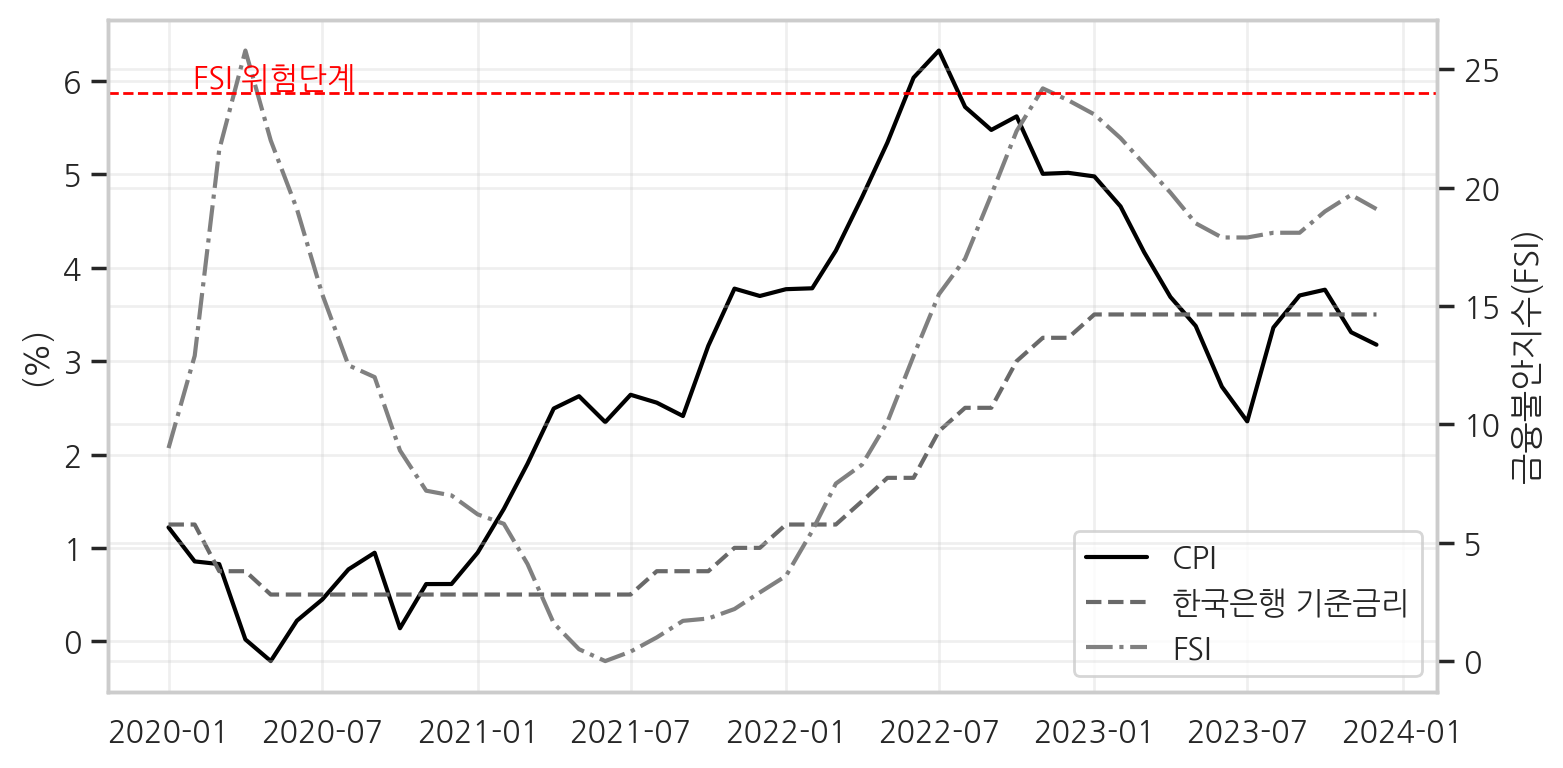

In [ ]:
plot_dual_axis(
    df_main.loc['2020-01':'2023-12'],
    left_vars=['CPI', '한국은행 기준금리'],
    right_vars=['FSI'],
    hlines=[(24, 'FSI 위험단계', 'red', 'right')],
    left_label='(%)',
    right_label='금융불안지수(FSI)',
    title='',
    color_mode = 'bw'
)


## 스웨덴의 역풍적 통화정책
- 릭스방크의 기준금리, 인플레이션

In [ ]:
# 릭스방크 기준금리 불러오기

import requests
from io import BytesIO

# 릭스방크의 기준금리 다운로드: https://www.riksbank.se/en-gb/statistics/interest-rates-and-exchange-rates/policy-rate-deposit-and-lending-rate/
url = "https://www.riksbank.se/globalassets/media/statistik/styrrantan/styrrantan-effektiv.xlsx"

# requests를 이용해 파일 다운로드
response = requests.get(url)
response.raise_for_status()  # 오류 발생 시 예외 발생

# BytesIO로 메모리에 올려서 pandas로 읽기
rate = pd.read_excel(BytesIO(response.content))

# 첫 번째 열을 datetime으로 변환
rate.iloc[:, 0] = pd.to_datetime(rate.iloc[:, 0])

# 인덱스로 지정
rate.set_index(rate.columns[0], inplace=True)

# 월 단위 PeriodIndex로 변환
rate.index = rate.index.to_period("M")

rate.index.name = 'mdate'
rate.columns = ['기준금리']

rate.head()

,기준금리
mdate,
2006-01,1.750
2006-03,2.000
2006-05,2.000
2006-06,2.250
2006-09,2.500


In [ ]:
# Infra-Annual Labor Statistics: Monthly Unemployment Rate Total: 15 Years or over for Sweden (LRHUTTTTSEM156S)
# Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: All Items Non-Food Non-Energy for Sweden (CPGRLE01SEM659N)
var_list = ['LRHUTTTTSEM156S', 'CPGRLE01SEM659N']
start = date(2006,1,1)
end = date(2025,6,30)

df_sweden = pdr.get_data_fred(var_list, start=start, end=end)
# 월 단위 PeriodIndex로 변환
df_sweden.index = df_sweden.index.to_period("M")

df_sweden.columns = ['실업률','코어 인플레이션']
df_sweden.index.name = 'mdate'

df_sweden.head(3)

,실업률,코어 인플레이션
mdate,,
2006-01,8.100,-0.191
2006-02,7.300,0.231
2006-03,7.600,0.543


In [ ]:
sweden = df_sweden.join(rate, how='left').sort_index()
# 금리 결측을 이전 관측치로 보간(초기 구간 NaN은 남김)
sweden['기준금리'] = sweden['기준금리'].ffill()
sweden.head(3)

,실업률,코어 인플레이션,기준금리
mdate,,,
2006-01,8.100,-0.191,1.750
2006-02,7.300,0.231,1.750
2006-03,7.600,0.543,2.000


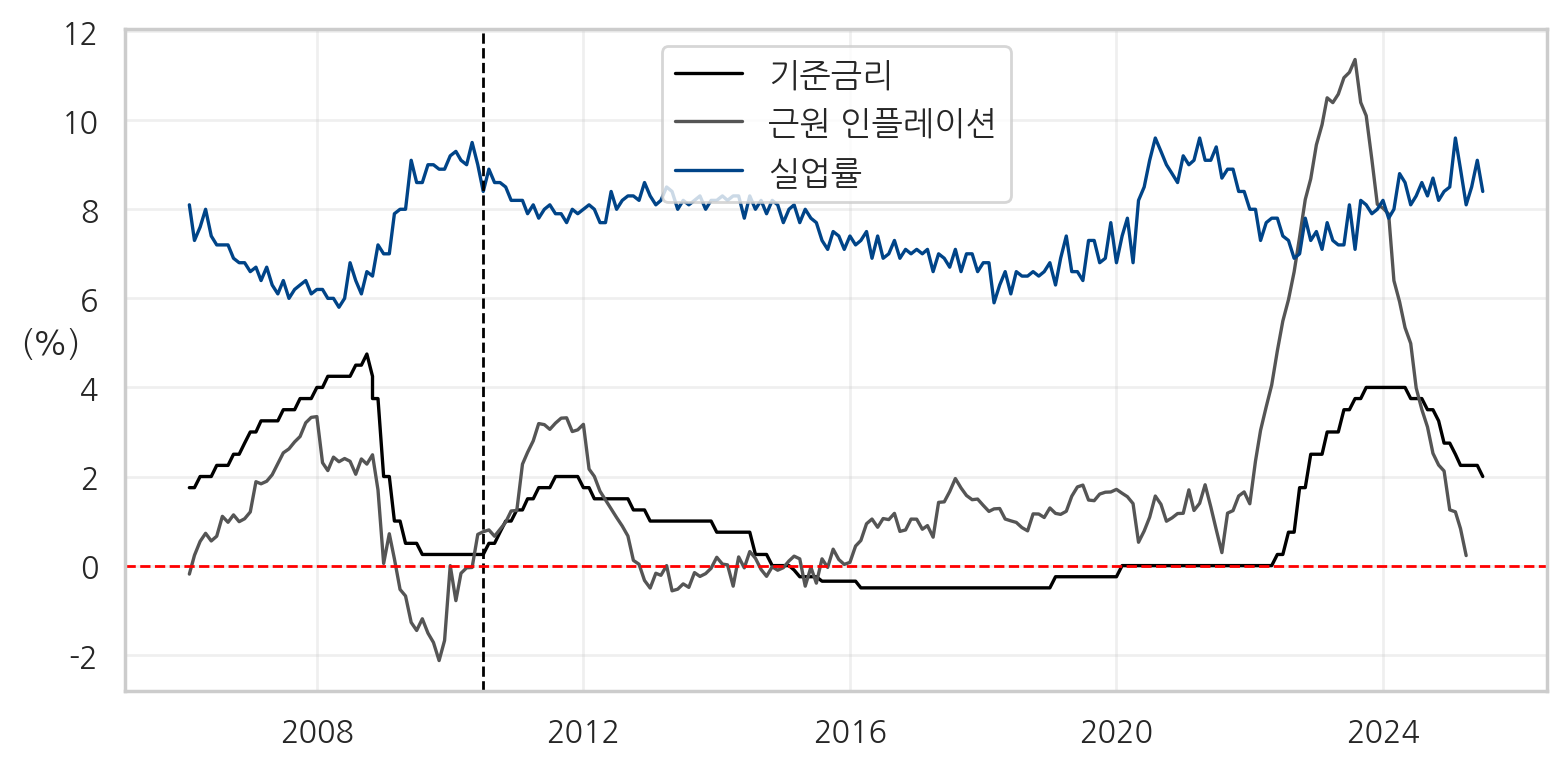

In [ ]:
plot_dual_axis(
    df=sweden,
    left_vars=['기준금리', '코어 인플레이션', '실업률'],  # 세 변수 모두 왼쪽 축
    linewidth=1.2,
    figsize=(8, 4),
    left_label='(%)',
    left_label_rotation=0,
    y_left_format='{x:,.0f}',

    # 범례 옵션
    legend_labels=['기준금리', '근원 인플레이션', '실업률'],
    legend_fontsize=12,
    legend_loc='upper center',

    # 색상/선 스타일 (원하시면 색상 직접 지정 가능)
    color_mode="limited",  # default/bw/limited
    # colors=['#004488', 'black', 'gray'],  # 직접 지정도 가능

    # 선/점/축 외 표시요소
    hlines=[(0, '', 'red')],  # y=0 가로선
    vlines=[(date(2010,7,1), '', 'black')]  # 세로선
)

In [ ]:
period = sweden.loc['2012-11':'2015-08',['코어 인플레이션']]

count_plus = (period > 0).sum()
print("2012-11 ~ 2015-08 기간 중 근원 인플레이션이 (+)였던 달 수:", count_plus)

2012-11 ~ 2015-08 기간 중 근원 인플레이션이 (+)였던 달 수: 코어 인플레이션    10
dtype: int64
